In [2]:
import sys
sys.path.append("../../")
import helper
from pandas import read_excel,DataFrame,melt,merge,read_csv
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

In [26]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.unicode_minus"] = False

In [20]:
origin=read_csv("공모전 및 프로젝트 엑셀파일/서울시 주요 공원현황.csv",encoding='euc-kr')
origin.head()

,연번,공원명,공원개요,면적,개원일,주요시설,주요식물,안내도,오시는길,이용시참고사항,이미지,지역,공원주소,관리부서,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),바로가기
0,1,남산도시자연공원,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,기반시설 : 광장 45950㎡ 도로 108530㎡ 산책로 6.7㎞ (북측:3.7㎞/...,소나무 단풍 아카시아 상수리나무 등 191종 2881870주,http://parks.seoul.go.kr/upload/seditorMulti/2...,명동역(남산케이블카 와룡묘 서울애니메이션센터 방면) 도보 명동역 3번출구 → 퍼시픽...,남산공원 차량통행 금지안내 2005년 5월 1일부터 남산공원에 일반승용차 택시 통행...,http://parks.seoul.go.kr/file/info/view.do?fId...,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,02-3783-5900,198364.107,450395.554,126.990377,37.550140,http://parks.seoul.go.kr/template/sub/namsan.do
1,2,길동생태공원,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...,80683㎡,1999.5.20,탐방객안내소 야외전시대 관찰대 목재데크 조류관찰대 길동생태문화센터,소나무 보리수 등 64종 31800주 산국 부들 등 138종 192800본,http://parks.seoul.go.kr/template/common/img/p...,NaN,매주 월요일은 휴관입니다 사전예약 후 입장하실 수 있습니다. ▶ 인터넷 예약 바로가...,http://parks.seoul.go.kr/file/info/view.do?fId...,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,02-489-2770,213554.120,448852.675,127.154779,37.540394,http://parks.seoul.go.kr/template/sub/gildong.do
2,3,서울대공원,서울대공원은 세계 각국의 야생동물들이 살아 숨 쉬는 서울동물원과 다양한 재미와 즐거...,9132690m²,1984.5.1,동물원 식물원 테마가든(장미원 어린이동물원 피크닉장) 치유숲 산림욕장 캠핑장 국립현...,NaN,NaN,지하철 4호선 대공원역 하차(2번 출구) 도보 15분 정도 문의처 02)500-73...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,과천시,경기도 과천시 대공원광장로 102,전략기획실,02-500-7032,200994.267,437163.981,127.019846,37.426449,http://grandpark.seoul.go.kr/
3,4,서울숲,당초 골프장 승마장 등이 있던 뚝섬일대를 주거업무 지역으로 개발할 경우 약 4조원에...,480994㎡,2005.6.18,4개 테마공원: 문화예술공원 자연생태숲 자연체험학습원 습지생태원 주요시설: 가족마당...,수 목 : 소나무 섬잣나무 계수나무 외 95종 415795주 식물원 : 선인장 등 ...,http://parks.seoul.go.kr/template/common/img/p...,NaN,지하철 분당선 서울숲역 3번출구 도보로 약5분 2호선 뚝섬역 8번출구 도보로 약 1...,http://parks.seoul.go.kr/file/info/view.do?fId...,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,02-460-2905,203695.432,449290.726,127.041798,37.543072,http://parks.seoul.go.kr/template/sub/seoulfor...
4,5,월드컵공원,월드컵공원은 서울의 서쪽에 위치하여 1978년부터 1993년까지 15년간 서울시민이...,2284085㎡,2002.5.1,평화의 공원 월드컵공원전시관(879㎡) 유니세프광장(2400㎡) 평화광장(5217㎡...,NaN,http://parks.seoul.go.kr/template/common/img/p...,지하철 6호선 월드컵경기장역 하차 → 1번 출구로 나온 후 직진 → 큰길(도로)이 ...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,02-300-5500,190658.070,451598.831,126.878907,37.571805,http://parks.seoul.go.kr/template/sub/worldcup...


In [21]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   연번            132 non-null    int64  
 1   공원명           132 non-null    object 
 2   공원개요          131 non-null    object 
 3   면적            129 non-null    object 
 4   개원일           122 non-null    object 
 5   주요시설          124 non-null    object 
 6   주요식물          88 non-null     object 
 7   안내도           102 non-null    object 
 8   오시는길          115 non-null    object 
 9   이용시참고사항       120 non-null    object 
 10  이미지           132 non-null    object 
 11  지역            132 non-null    object 
 12  공원주소          132 non-null    object 
 13  관리부서          132 non-null    object 
 14  전화번호          132 non-null    object 
 15  X좌표(GRS80TM)  122 non-null    float64
 16  Y좌표(GRS80TM)  122 non-null    float64
 17  X좌표(WGS84)    131 non-null    float64
 18  Y좌표(WGS84)    131 non-null    

In [22]:
origin.isna().sum()

연번                0
공원명               0
공원개요              1
면적                3
개원일              10
주요시설              8
주요식물             44
안내도              30
오시는길             17
이용시참고사항          12
이미지               0
지역                0
공원주소              0
관리부서              0
전화번호              0
X좌표(GRS80TM)     10
Y좌표(GRS80TM)     10
X좌표(WGS84)        1
Y좌표(WGS84)        1
바로가기            114
dtype: int64

In [23]:
df=origin.copy()
df.head()

,연번,공원명,공원개요,면적,개원일,주요시설,주요식물,안내도,오시는길,이용시참고사항,이미지,지역,공원주소,관리부서,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),바로가기
0,1,남산도시자연공원,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,기반시설 : 광장 45950㎡ 도로 108530㎡ 산책로 6.7㎞ (북측:3.7㎞/...,소나무 단풍 아카시아 상수리나무 등 191종 2881870주,http://parks.seoul.go.kr/upload/seditorMulti/2...,명동역(남산케이블카 와룡묘 서울애니메이션센터 방면) 도보 명동역 3번출구 → 퍼시픽...,남산공원 차량통행 금지안내 2005년 5월 1일부터 남산공원에 일반승용차 택시 통행...,http://parks.seoul.go.kr/file/info/view.do?fId...,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,02-3783-5900,198364.107,450395.554,126.990377,37.550140,http://parks.seoul.go.kr/template/sub/namsan.do
1,2,길동생태공원,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...,80683㎡,1999.5.20,탐방객안내소 야외전시대 관찰대 목재데크 조류관찰대 길동생태문화센터,소나무 보리수 등 64종 31800주 산국 부들 등 138종 192800본,http://parks.seoul.go.kr/template/common/img/p...,NaN,매주 월요일은 휴관입니다 사전예약 후 입장하실 수 있습니다. ▶ 인터넷 예약 바로가...,http://parks.seoul.go.kr/file/info/view.do?fId...,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,02-489-2770,213554.120,448852.675,127.154779,37.540394,http://parks.seoul.go.kr/template/sub/gildong.do
2,3,서울대공원,서울대공원은 세계 각국의 야생동물들이 살아 숨 쉬는 서울동물원과 다양한 재미와 즐거...,9132690m²,1984.5.1,동물원 식물원 테마가든(장미원 어린이동물원 피크닉장) 치유숲 산림욕장 캠핑장 국립현...,NaN,NaN,지하철 4호선 대공원역 하차(2번 출구) 도보 15분 정도 문의처 02)500-73...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,과천시,경기도 과천시 대공원광장로 102,전략기획실,02-500-7032,200994.267,437163.981,127.019846,37.426449,http://grandpark.seoul.go.kr/
3,4,서울숲,당초 골프장 승마장 등이 있던 뚝섬일대를 주거업무 지역으로 개발할 경우 약 4조원에...,480994㎡,2005.6.18,4개 테마공원: 문화예술공원 자연생태숲 자연체험학습원 습지생태원 주요시설: 가족마당...,수 목 : 소나무 섬잣나무 계수나무 외 95종 415795주 식물원 : 선인장 등 ...,http://parks.seoul.go.kr/template/common/img/p...,NaN,지하철 분당선 서울숲역 3번출구 도보로 약5분 2호선 뚝섬역 8번출구 도보로 약 1...,http://parks.seoul.go.kr/file/info/view.do?fId...,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,02-460-2905,203695.432,449290.726,127.041798,37.543072,http://parks.seoul.go.kr/template/sub/seoulfor...
4,5,월드컵공원,월드컵공원은 서울의 서쪽에 위치하여 1978년부터 1993년까지 15년간 서울시민이...,2284085㎡,2002.5.1,평화의 공원 월드컵공원전시관(879㎡) 유니세프광장(2400㎡) 평화광장(5217㎡...,NaN,http://parks.seoul.go.kr/template/common/img/p...,지하철 6호선 월드컵경기장역 하차 → 1번 출구로 나온 후 직진 → 큰길(도로)이 ...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,02-300-5500,190658.070,451598.831,126.878907,37.571805,http://parks.seoul.go.kr/template/sub/worldcup...


In [24]:
df1=df.drop(['안내도','오시는길','이용시참고사항','관리부서','전화번호','X좌표(GRS80TM)','Y좌표(GRS80TM)','이미지','바로가기'],axis=1)
df1.head()

,연번,공원명,공원개요,면적,개원일,주요시설,주요식물,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
0,1,남산도시자연공원,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,기반시설 : 광장 45950㎡ 도로 108530㎡ 산책로 6.7㎞ (북측:3.7㎞/...,소나무 단풍 아카시아 상수리나무 등 191종 2881870주,중구,서울특별시 중구 삼일대로 231(예장동),126.990377,37.550140
1,2,길동생태공원,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...,80683㎡,1999.5.20,탐방객안내소 야외전시대 관찰대 목재데크 조류관찰대 길동생태문화센터,소나무 보리수 등 64종 31800주 산국 부들 등 138종 192800본,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),127.154779,37.540394
2,3,서울대공원,서울대공원은 세계 각국의 야생동물들이 살아 숨 쉬는 서울동물원과 다양한 재미와 즐거...,9132690m²,1984.5.1,동물원 식물원 테마가든(장미원 어린이동물원 피크닉장) 치유숲 산림욕장 캠핑장 국립현...,NaN,과천시,경기도 과천시 대공원광장로 102,127.019846,37.426449
3,4,서울숲,당초 골프장 승마장 등이 있던 뚝섬일대를 주거업무 지역으로 개발할 경우 약 4조원에...,480994㎡,2005.6.18,4개 테마공원: 문화예술공원 자연생태숲 자연체험학습원 습지생태원 주요시설: 가족마당...,수 목 : 소나무 섬잣나무 계수나무 외 95종 415795주 식물원 : 선인장 등 ...,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),127.041798,37.543072
4,5,월드컵공원,월드컵공원은 서울의 서쪽에 위치하여 1978년부터 1993년까지 15년간 서울시민이...,2284085㎡,2002.5.1,평화의 공원 월드컵공원전시관(879㎡) 유니세프광장(2400㎡) 평화광장(5217㎡...,NaN,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),126.878907,37.571805


In [25]:
df1.isna().sum()

연번             0
공원명            0
공원개요           1
면적             3
개원일           10
주요시설           8
주요식물          44
지역             0
공원주소           0
X좌표(WGS84)     1
Y좌표(WGS84)     1
dtype: int64

In [27]:
count_by_area = df1.groupby('지역').size().reset_index(name='갯수')
count_by_area

,지역,갯수
0,강남구,7
1,강동구,7
2,강북구,4
3,강서구,9
4,과천시,1
5,관악구,2
6,광진구,2
7,구로구,4
8,금천구,4
9,노원구,3


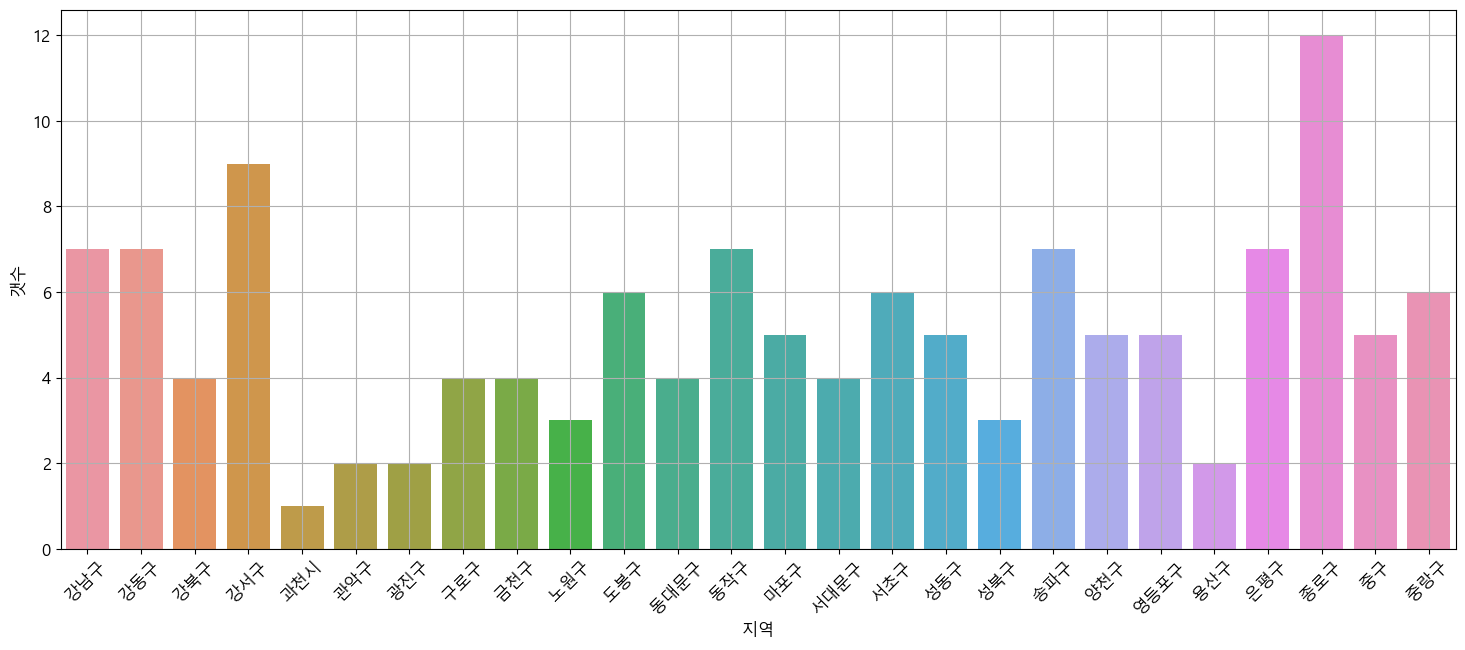

In [31]:
plt.figure(figsize=(18,7))
sb.barplot(data=count_by_area,x='지역',y='갯수')
plt.xticks(rotation=45)
plt.grid()
plt.show()
plt.close()